In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF,PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans,SpectralClustering
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from tqdm import tqdm
tqdm.pandas()

combined = pd.read_csv('scored_datasets/combined.csv')

# 3. Clustering

## PCA dimension reduction and Minibatch K-Means

### Colour by era, symbol by cluster

C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


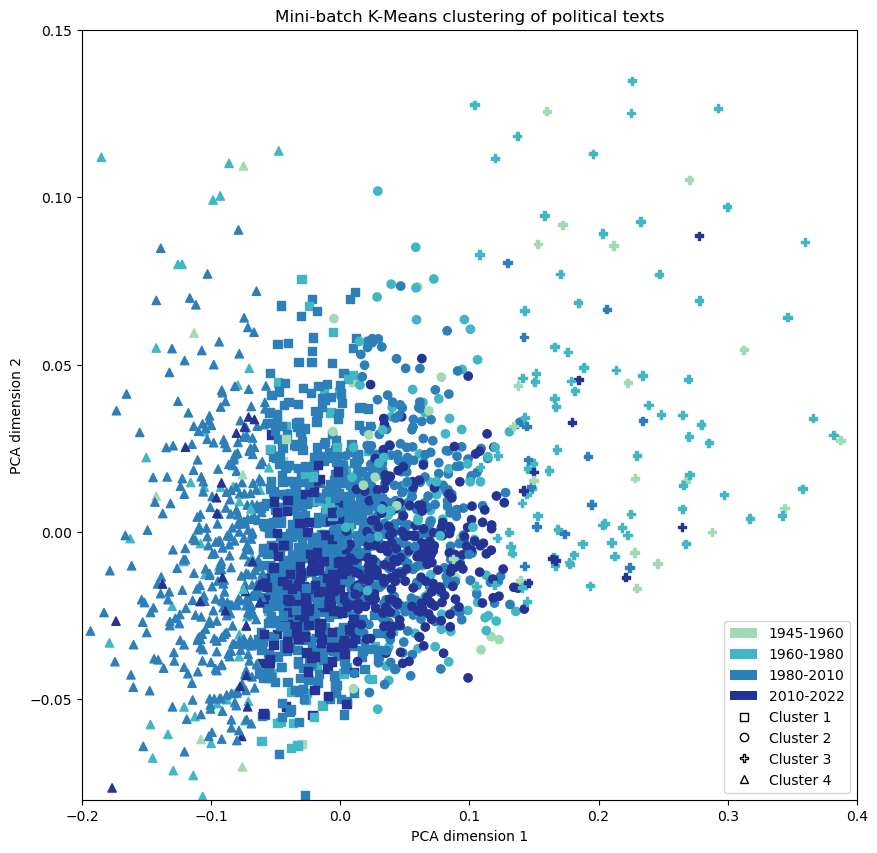

In [18]:
era_dict = {'1945-1960':(1945,1960),
            '1960-1980':(1960,1980),
            '1980-2010':(1980,2010),
            '2010-2022':(2010,2023)}
marker_dict = {0:'s',
               1:'o',
               2:'P',
               3:'^'}
colour_dict = {'1945-1960':'#a1dab4',
               '1960-1980':'#41b6c4',
               '1980-2010':'#2c7fb8',
               '2010-2022':'#253494'}

combined['era'] = combined['year'].apply(lambda year: [era for era,yrs in era_dict.items() if pd.to_datetime(year).year>=yrs[0] and pd.to_datetime(year).year<yrs[1]][0])

kmeans = MiniBatchKMeans(n_clusters=4)
kmeans_pred = kmeans.fit_predict(combined.drop(['type','year','party','era'],axis=1))

pca = PCA(n_components=2)
pca_trns = pca.fit_transform(combined.drop(['type','year','party','era'],axis=1))

fig,ax = plt.subplots(figsize=(10,10))

for cluster,marker in marker_dict.items():
    ax.scatter(pca_trns[kmeans_pred==cluster,0], pca_trns[kmeans_pred==cluster,1],
                color=combined[kmeans_pred==cluster].era.apply(lambda era: colour_dict[era]),
                marker=marker)

colour_labels = ["1945-1960","1960-1980","1980-2010","2010-2022"]
marker_labels = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in colour_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]

ax.legend(colour_artists+marker_artists,
          colour_labels+marker_labels)

ax.set_title("Mini-batch K-Means clustering of political texts")
ax.set_xlabel("PCA dimension 1")
ax.set_ylabel("PCA dimension 2")
    
ax.set_xlim(-0.2,0.4)
ax.set_ylim(-0.08,0.15)

plt.savefig('../figs/cluster/pca_reduction_kmeans_clustering.png')
plt.show()

## PCA dimension reduction and Spectral Clustering

### Colour by era, symbol by cluster

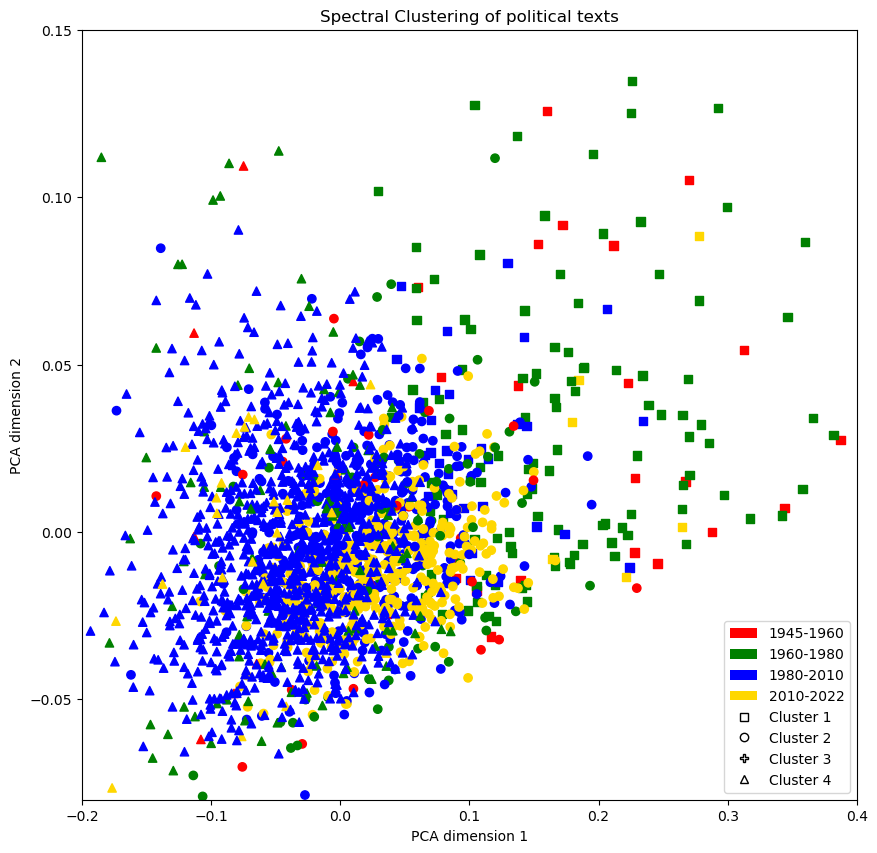

In [4]:
era_dict = {'1945-1960':(1945,1960),
            '1960-1980':(1960,1980),
            '1980-2010':(1980,2010),
            '2010-2022':(2010,2023)}
marker_dict = {0:'s',
               1:'o',
               2:'P',
               3:'^'}
colour_dict = {'1945-1960':'red',
               '1960-1980':'green',
               '1980-2010':'blue',
               '2010-2022':'gold'}

combined['era'] = combined['year'].apply(lambda year: [era for era,yrs in era_dict.items() if pd.to_datetime(year).year>=yrs[0] and pd.to_datetime(year).year<yrs[1]][0])

spec = SpectralClustering(n_clusters=4)
spec_pred = spec.fit_predict(combined.drop(['type','year','party','era'],axis=1))

pca = PCA(n_components=2)
pca_trns = pca.fit_transform(combined.drop(['type','year','party','era'],axis=1))

fig,ax = plt.subplots(figsize=(10,10))

for cluster,marker in marker_dict.items():
    ax.scatter(pca_trns[spec_pred==cluster,0], pca_trns[spec_pred==cluster,1],
                color=combined[spec_pred==cluster].era.apply(lambda era: colour_dict[era]),
                marker=marker)

colour_labels = ["1945-1960","1960-1980","1980-2010","2010-2022"]
marker_labels = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in colour_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]

ax.legend(colour_artists+marker_artists,
          colour_labels+marker_labels)

ax.set_title("Spectral Clustering of political texts")
ax.set_xlabel("PCA dimension 1")
ax.set_ylabel("PCA dimension 2")
    
ax.set_xlim(-0.2,0.4)
ax.set_ylim(-0.08,0.15)
plt.show()

### Colour by cluster, symbol by era

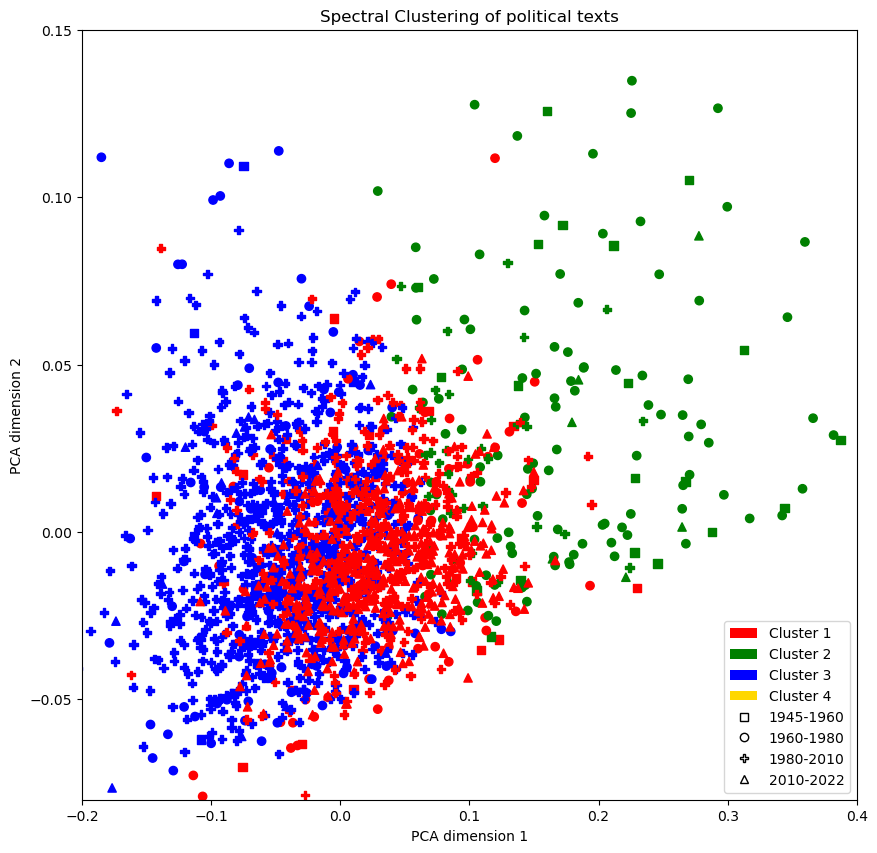

In [5]:
era_dict = {'1945-1960':(1945,1960),
            '1960-1980':(1960,1980),
            '1980-2010':(1980,2010),
            '2010-2022':(2010,2023)}
colour_dict = {0:'red',
               1:'green',
               2:'blue',
               3:'gold'}
marker_dict = {'1945-1960':'s',
               '1960-1980':'o',
               '1980-2010':'P',
               '2010-2022':'^'}

combined['era'] = combined['year'].apply(lambda year: [era for era,yrs in era_dict.items() if pd.to_datetime(year).year>=yrs[0] and pd.to_datetime(year).year<yrs[1]][0])

spec = SpectralClustering(n_clusters=4)
spec_pred = spec.fit_predict(combined.drop(['type','year','party','era'],axis=1))

pca = PCA(n_components=2)
pca_trns = pca.fit_transform(combined.drop(['type','year','party','era'],axis=1))

fig,ax = plt.subplots(figsize=(10,10))

for era,marker in marker_dict.items():
    ax.scatter(pca_trns[combined.era==era,0], pca_trns[combined.era==era,1],
                color=[colour_dict[cluster] for cluster in spec_pred[combined.era==era]],
                marker=marker)

marker_labels = ["1945-1960","1960-1980","1980-2010","2010-2022"]
colour_labels = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in colour_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]

ax.legend(colour_artists+marker_artists,
          colour_labels+marker_labels)

ax.set_title("Spectral Clustering of political texts")
ax.set_xlabel("PCA dimension 1")
ax.set_ylabel("PCA dimension 2")
    
ax.set_xlim(-0.2,0.4)
ax.set_ylim(-0.08,0.15)
plt.show()

## t-SNE dimension reduction and Minibatch K-Means

C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


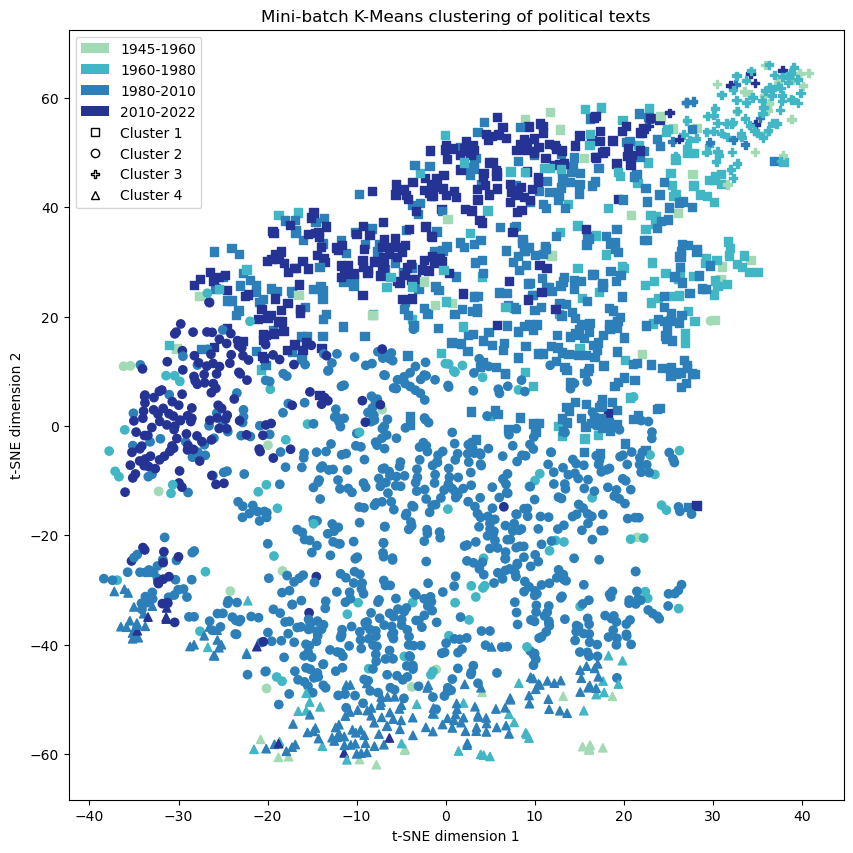

In [16]:
era_dict = {'1945-1960':(1945,1960),
            '1960-1980':(1960,1980),
            '1980-2010':(1980,2010),
            '2010-2022':(2010,2023)}
marker_dict = {0:'s',
               1:'o',
               2:'P',
               3:'^'}
colour_dict = {'1945-1960':'#a1dab4',
               '1960-1980':'#41b6c4',
               '1980-2010':'#2c7fb8',
               '2010-2022':'#253494'}

combined['era'] = combined['year'].apply(lambda year: [era for era,yrs in era_dict.items() if pd.to_datetime(year).year>=yrs[0] and pd.to_datetime(year).year<yrs[1]][0])

kmeans = MiniBatchKMeans(n_clusters=4)
kmeans_pred = kmeans.fit_predict(combined.drop(['type','year','party','era'],axis=1))

tsne = TSNE(n_components=2)
tsne_trns = tsne.fit_transform(combined.drop(['type','year','party','era'],axis=1))

fig,ax = plt.subplots(figsize=(10,10))

for cluster,marker in marker_dict.items():
    ax.scatter(tsne_trns[kmeans_pred==cluster,0], tsne_trns[kmeans_pred==cluster,1],
                color=combined[kmeans_pred==cluster].era.apply(lambda era: colour_dict[era]),
                marker=marker)

colour_labels = ["1945-1960","1960-1980","1980-2010","2010-2022"]
marker_labels = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in colour_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]

ax.legend(colour_artists+marker_artists,
          colour_labels+marker_labels)

ax.set_title("Mini-batch K-Means clustering of political texts")
ax.set_xlabel("t-SNE dimension 1")
ax.set_ylabel("t-SNE dimension 2")

plt.savefig('../figs/cluster/tsne_reduction_kmeans_clustering.png')
plt.show()

C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


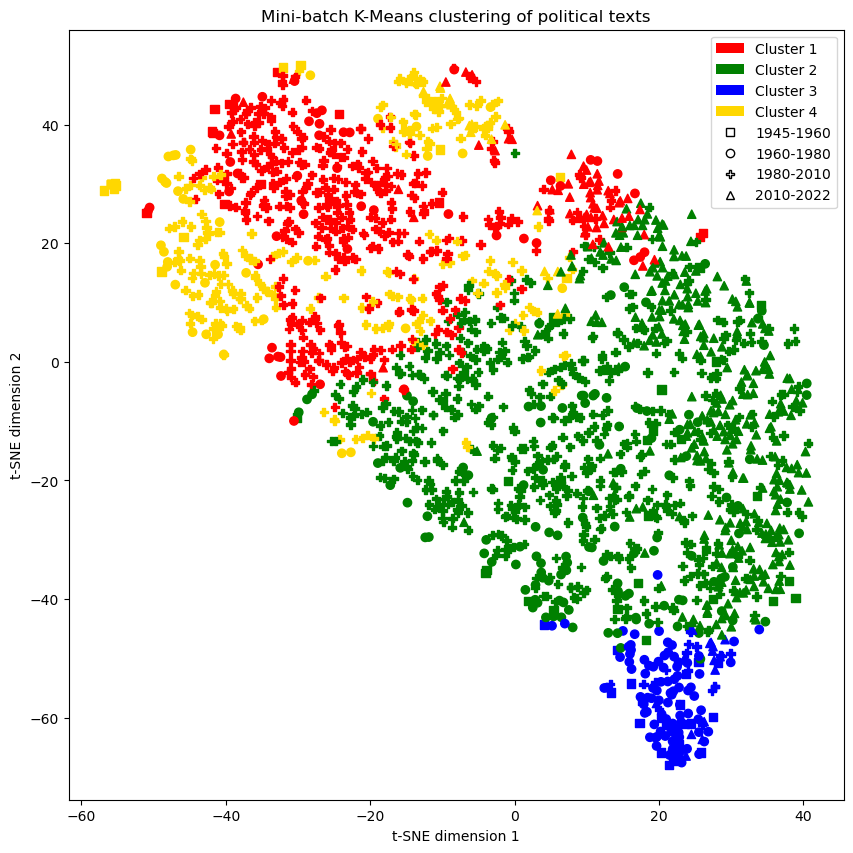

In [7]:
era_dict = {'1945-1960':(1945,1960),
            '1960-1980':(1960,1980),
            '1980-2010':(1980,2010),
            '2010-2022':(2010,2023)}
colour_dict = {0:'red',
               1:'green',
               2:'blue',
               3:'gold'}
marker_dict = {'1945-1960':'s',
               '1960-1980':'o',
               '1980-2010':'P',
               '2010-2022':'^'}

combined['era'] = combined['year'].apply(lambda year: [era for era,yrs in era_dict.items() if pd.to_datetime(year).year>=yrs[0] and pd.to_datetime(year).year<yrs[1]][0])

kmeans = MiniBatchKMeans(n_clusters=4)
kmeans_pred = kmeans.fit_predict(combined.drop(['type','year','party','era'],axis=1))

tsne = TSNE(n_components=2)
tsne_trns = tsne.fit_transform(combined.drop(['type','year','party','era'],axis=1))

fig,ax = plt.subplots(figsize=(10,10))

for era,marker in marker_dict.items():
    ax.scatter(tsne_trns[combined.era==era,0], tsne_trns[combined.era==era,1],
                color=[colour_dict[cluster] for cluster in kmeans_pred[combined.era==era]],
                marker=marker)

marker_labels = ["1945-1960","1960-1980","1980-2010","2010-2022"]
colour_labels = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in colour_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]

ax.legend(colour_artists+marker_artists,
          colour_labels+marker_labels)

ax.set_title("Mini-batch K-Means clustering of political texts")
ax.set_xlabel("t-SNE dimension 1")
ax.set_ylabel("t-SNE dimension 2")
    
plt.show()

## NMF dimension reduction and Minibatch K-Means

C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


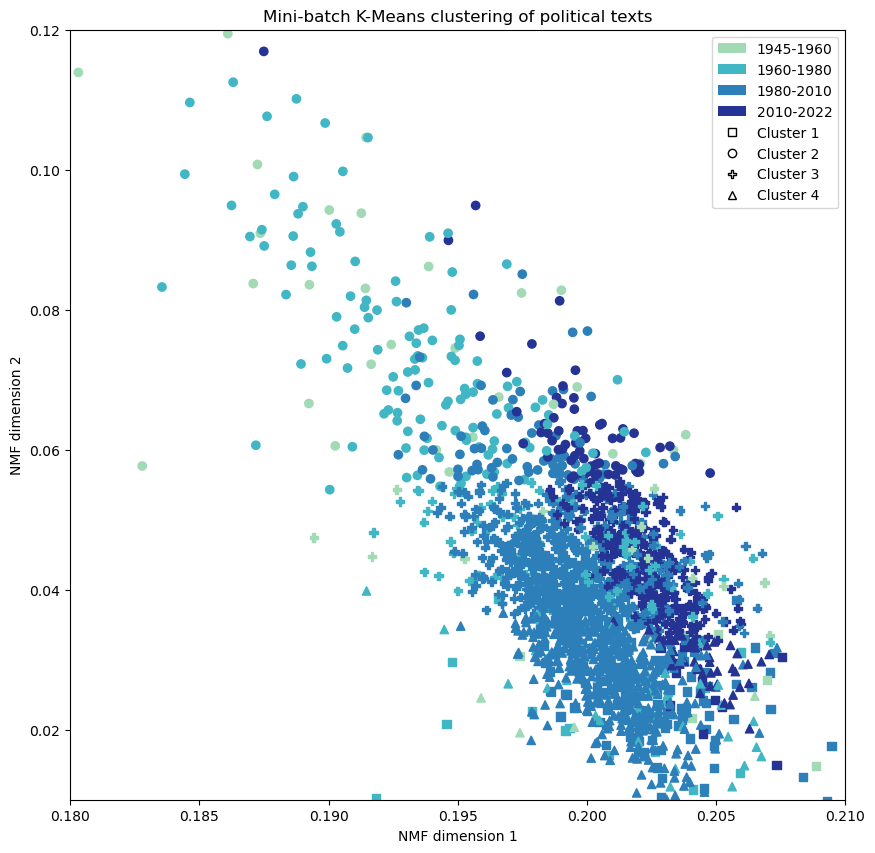

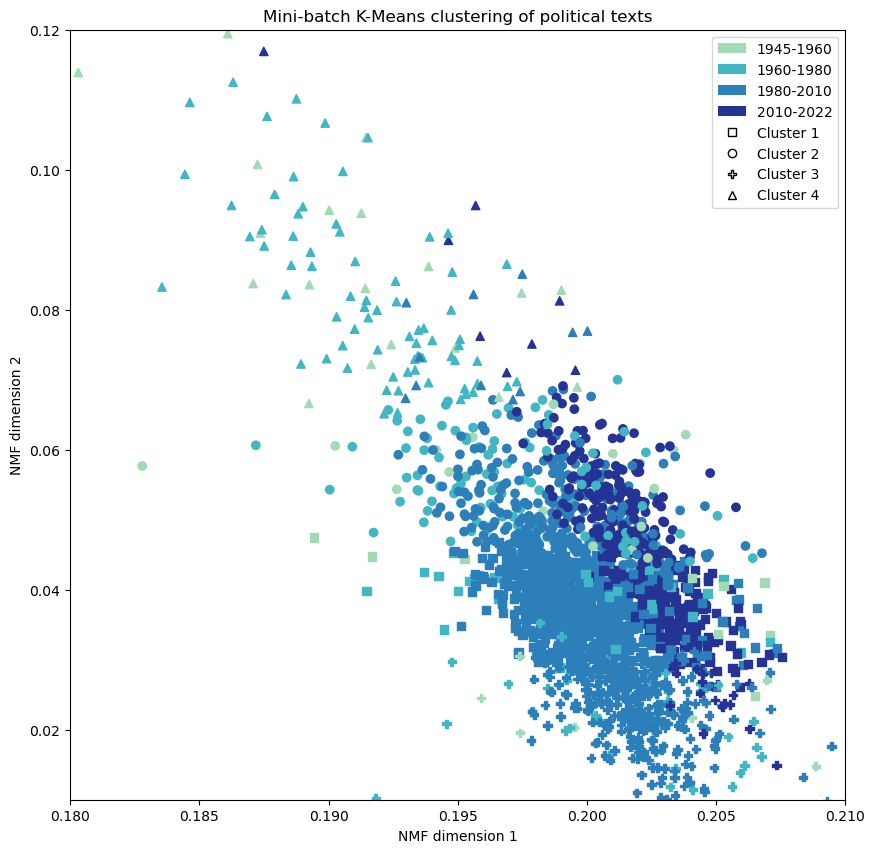

In [13]:
era_dict = {'1945-1960':(1945,1960),
            '1960-1980':(1960,1980),
            '1980-2010':(1980,2010),
            '2010-2022':(2010,2023)}
marker_dict = {0:'s',
               1:'o',
               2:'P',
               3:'^'}
colour_dict = {'1945-1960':'#a1dab4',
               '1960-1980':'#41b6c4',
               '1980-2010':'#2c7fb8',
               '2010-2022':'#253494'}

combined['era'] = combined['year'].apply(lambda year: [era for era,yrs in era_dict.items() if pd.to_datetime(year).year>=yrs[0] and pd.to_datetime(year).year<yrs[1]][0])

kmeans = MiniBatchKMeans(n_clusters=4)
kmeans_pred = kmeans.fit_predict(combined.drop(['type','year','party','era'],axis=1))

nmf = NMF(n_components=2)
nmf_trns = nmf.fit_transform(combined.drop(['type','year','party','era'],axis=1))

fig,ax = plt.subplots(figsize=(10,10))

for cluster,marker in marker_dict.items():
    ax.scatter(nmf_trns[kmeans_pred==cluster,0], nmf_trns[kmeans_pred==cluster,1],
                color=combined[kmeans_pred==cluster].era.apply(lambda era: colour_dict[era]),
                marker=marker)

colour_labels = ["1945-1960","1960-1980","1980-2010","2010-2022"]
marker_labels = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in colour_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]

ax.legend(colour_artists+marker_artists,
          colour_labels+marker_labels)

ax.set_title("Mini-batch K-Means clustering of political texts")
ax.set_xlabel("NMF dimension 1")
ax.set_ylabel("NMF dimension 2")
    
ax.set_xlim(0.18,0.21)
ax.set_ylim(0.01,0.12)
plt.savefig('../figs/cluster/nmf_reduction_kmeans_clustering.png')
plt.show()

C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


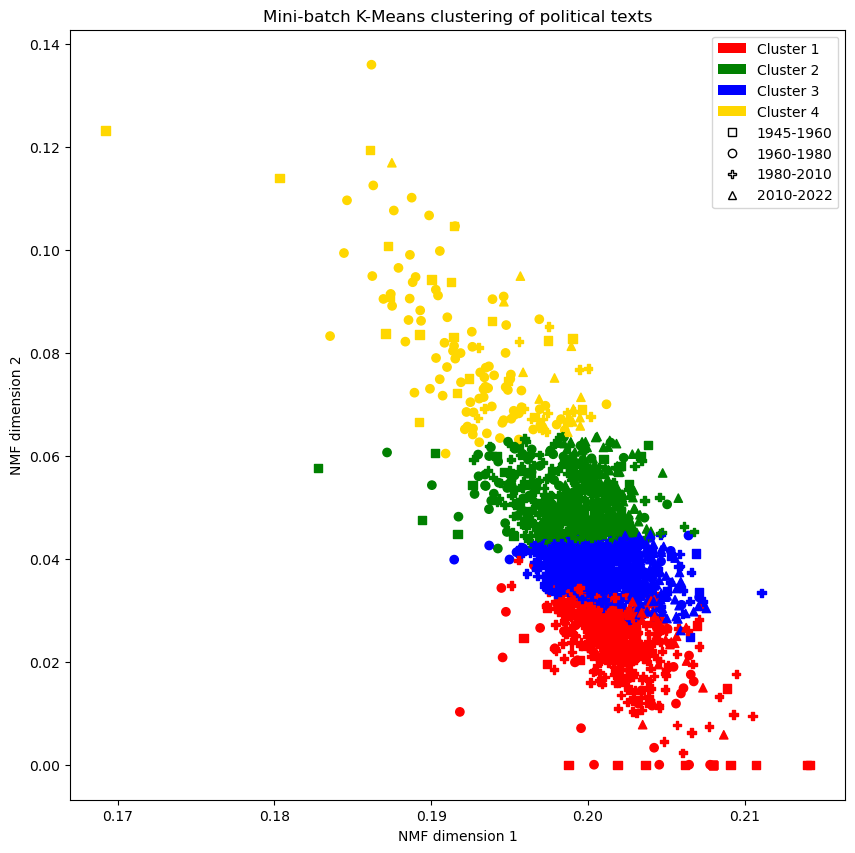

In [9]:
era_dict = {'1945-1960':(1945,1960),
            '1960-1980':(1960,1980),
            '1980-2010':(1980,2010),
            '2010-2022':(2010,2023)}
colour_dict = {0:'red',
               1:'green',
               2:'blue',
               3:'gold'}
marker_dict = {'1945-1960':'s',
               '1960-1980':'o',
               '1980-2010':'P',
               '2010-2022':'^'}

combined['era'] = combined['year'].apply(lambda year: [era for era,yrs in era_dict.items() if pd.to_datetime(year).year>=yrs[0] and pd.to_datetime(year).year<yrs[1]][0])

kmeans = MiniBatchKMeans(n_clusters=4)
kmeans_pred = kmeans.fit_predict(combined.drop(['type','year','party','era'],axis=1))

nmf = NMF(n_components=2)
nmf_trns = nmf.fit_transform(combined.drop(['type','year','party','era'],axis=1))

fig,ax = plt.subplots(figsize=(10,10))

for era,marker in marker_dict.items():
    ax.scatter(nmf_trns[combined.era==era,0], nmf_trns[combined.era==era,1],
                color=[colour_dict[cluster] for cluster in kmeans_pred[combined.era==era]],
                marker=marker)

marker_labels = ["1945-1960","1960-1980","1980-2010","2010-2022"]
colour_labels = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in colour_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]

ax.legend(colour_artists+marker_artists,
          colour_labels+marker_labels)

ax.set_title("Mini-batch K-Means clustering of political texts")
ax.set_xlabel("NMF dimension 1")
ax.set_ylabel("NMF dimension 2")
    
# ax.set_xlim(-0.2,0.4)
# ax.set_ylim(-0.08,0.15)
plt.show()

## 